In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime


#display all rows and coloumn
pd.set_option('display.max_rows',None); # all rows
pd.set_option('display.max_columns',None); # all cloumns
pd.set_option('display.expand_frame_repr',False); #full display
pd.set_option('max_colwidth',-1); 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



# **Data Extraction**

In [ ]:
# ball by ball data
df = pd.read_csv('ipl_ball_by_ball_data.csv')
df.head(10)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.4,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
5,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.5,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.6,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,4.1,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,AB Agarkar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,4.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Agarkar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,4.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,AB Agarkar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.innings.unique()
# innings 3 and 4 are super over and 5 and 6 are double super over

array([1, 2, 4, 3, 5, 6])

In [ ]:
df = df[(df.innings == 1)|(df.innings == 2)] # dropping super over
df.innings.unique()

array([1, 2])

In [ ]:
# number of faceoff of abd and bumrah

df.bowling_team.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

In [ ]:
df[df.bowling_team == 'Mumbai Indians']['bowler'].unique()

array(['DS Kulkarni', 'A Nehra', 'AM Nayar', 'Harbhajan Singh',
       'ST Jayasuriya', 'SM Pollock', 'MA Khote', 'DJ Bravo',
       'VS Yeligati', 'SD Chitnis', 'CRD Fernando', 'DJ Thornely',
       'RR Raje', 'DR Smith', 'A Nel', 'SL Malinga', 'Z Khan',
       'SR Tendulkar', 'JP Duminy', 'GR Napier', 'C Nanda', 'AM Rahane',
       'RA Shaikh', 'R McLaren', 'R Sathish', 'AG Murtaza', 'KA Pollard',
       'AN Ahmed', 'STR Binny', 'MM Patel', 'JEC Franklin', 'RG Sharma',
       'A Symonds', 'TL Suman', 'RW Price', 'PP Ojha', 'RP Singh',
       'CJ McKay', 'NLTC Perera', 'RJ Peterson', 'R Shukla', 'JDP Oram',
       'JJ Bumrah', 'MG Johnson', 'R Dhawan', 'YS Chahal', 'P Suyal',
       'GJ Maxwell', 'NM Coulter-Nile', 'CJ Anderson', 'P Kumar',
       'LMP Simmons', 'S Gopal', 'K Santokie', 'M de Lange',
       'R Vinay Kumar', 'J Suchith', 'MJ McClenaghan', 'HH Pandya',
       'TG Southee', 'KH Pandya', 'N Rana', 'KV Sharma', 'M Markande',
       'Mustafizur Rahman', 'PJ Sangwan', 'BCJ C

In [ ]:
#JJ Bumrah

In [ ]:
df.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

In [ ]:
df[df.batting_team == 'Royal Challengers Bangalore']['striker'].unique()

array(['W Jaffer', 'JH Kallis', 'CL White', 'MV Boucher', 'R Dravid',
       'V Kohli', 'P Kumar', 'Z Khan', 'SB Joshi', 'AA Noffke', 'B Akhil',
       'LRPL Taylor', 'S Chanderpaul', 'R Vinay Kumar', 'DW Steyn',
       'B Chipli', 'Misbah-ul-Haq', 'DT Patil', 'A Kumble', 'J Arunkumar',
       'Abdur Razzak', 'SP Goswami', 'KP Pietersen', 'RV Uthappa',
       'JD Ryder', 'R Bishnoi', 'KV Sharma', 'Pankaj Singh', 'MK Pandey',
       'RE van der Merwe', 'KP Appanna', 'D du Preez', 'EJG Morgan',
       'A Mithun', 'S Sriram', 'MA Agarwal', 'AB de Villiers',
       'TM Dilshan', 'SS Tiwary', 'AUK Pathan', 'S Aravind', 'CA Pujara',
       'JJ van der Wath', 'R Ninan', 'DL Vettori', 'CH Gayle',
       'J Syed Mohammad', 'M Kaif', 'LA Pomersbach', 'KB Arun Karthik',
       'CK Langeveldt', 'AB McDonald', 'HV Patel', 'RR Bhatkal',
       'M Muralitharan', 'P Parameswaran', 'DT Christian', 'KK Nair',
       'MC Henriques', 'M Kartik', 'JD Unadkat', 'R Rampaul', 'KL Rahul',
       'A Mukund', 'P

In [ ]:
#AB de Villiers

In [ ]:
req_df = df[(df.striker=='AB de Villiers')&(df.bowler=='JJ Bumrah')]
req_df.head(10)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
95889,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.6,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95890,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.5,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95892,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.3,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95893,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.2,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95894,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.1,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95985,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,6.1,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95987,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,6.2,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95990,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,6.4,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100846,733983,2014,2014-05-06,Wankhede Stadium,2,12.2,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,V Kohli,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100847,733983,2014,2014-05-06,Wankhede Stadium,2,12.3,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,V Kohli,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Calculating the KPIs**

In [ ]:
# number of runs scored
# number of balls faced
#number of times dismmised 
#STRIKE RATE

# ABD                      # balls faced   # outs

sum(req_df.runs_off_bat) , len(req_df) , len(req_df[req_df.player_dismissed == 'AB de Villiers']) 
                                         # count of number of rows in which dismisial name is ABD                                               

(114, 79, 2)

In [ ]:
# strike rate

100*(sum(req_df.runs_off_bat)/len(req_df))

144.30379746835442

In [ ]:
# comparing against all batsman bumrah has bowled

bumrah_df = df[df.bowler=='JJ Bumrah']
bumrah_df.tail(30)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
199560,1254081,2021,2021-04-29,"Arun Jaitley Stadium, Delhi",1,18.5,Rajasthan Royals,Mumbai Indians,S Dube,DA Miller,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,caught and bowled,S Dube,NaN,NaN
199590,1254081,2021,2021-04-29,"Arun Jaitley Stadium, Delhi",1,18.4,Rajasthan Royals,Mumbai Indians,DA Miller,S Dube,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199644,1254081,2021,2021-04-29,"Arun Jaitley Stadium, Delhi",1,18.6,Rajasthan Royals,Mumbai Indians,R Parag,DA Miller,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200077,1254084,2021,2021-05-01,"Arun Jaitley Stadium, Delhi",1,10.1,Chennai Super Kings,Mumbai Indians,F du Plessis,MM Ali,JJ Bumrah,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200081,1254084,2021,2021-05-01,"Arun Jaitley Stadium, Delhi",1,4.6,Chennai Super Kings,Mumbai Indians,F du Plessis,MM Ali,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200106,1254084,2021,2021-05-01,"Arun Jaitley Stadium, Delhi",1,4.1,Chennai Super Kings,Mumbai Indians,F du Plessis,MM Ali,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200107,1254084,2021,2021-05-01,"Arun Jaitley Stadium, Delhi",1,4.2,Chennai Super Kings,Mumbai Indians,F du Plessis,MM Ali,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200108,1254084,2021,2021-05-01,"Arun Jaitley Stadium, Delhi",1,4.3,Chennai Super Kings,Mumbai Indians,MM Ali,F du Plessis,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200109,1254084,2021,2021-05-01,"Arun Jaitley Stadium, Delhi",1,4.4,Chennai Super Kings,Mumbai Indians,MM Ali,F du Plessis,JJ Bumrah,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200110,1254084,2021,2021-05-01,"Arun Jaitley Stadium, Delhi",1,4.5,Chennai Super Kings,Mumbai Indians,MM Ali,F du Plessis,JJ Bumrah,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# sum of runs scored by batsman against bumrah

bdf1 = pd.DataFrame(bumrah_df.groupby('striker')['runs_off_bat'].sum()).reset_index() # runs against bumrah
bdf1.head()

,striker,runs_off_bat
0,A Mishra,1
1,AB de Villiers,114
2,AD Nath,4
3,AD Russell,51
4,AJ Finch,24


In [ ]:
# balls faced by players

bdf2 = pd.DataFrame(bumrah_df.groupby('striker')['ball'].count()).reset_index() # runs against bumrah
bdf2.head()

,striker,ball
0,A Mishra,5
1,AB de Villiers,79
2,AD Nath,4
3,AD Russell,41
4,AJ Finch,29


In [ ]:
bdf3 = bdf1.merge(bdf2,on='striker',how='left')
bdf3.head()

,striker,runs_off_bat,ball
0,A Mishra,1,5
1,AB de Villiers,114,79
2,AD Nath,4,4
3,AD Russell,51,41
4,AJ Finch,24,29


In [ ]:
bdf3['strike_rate'] = 100*bdf3['runs_off_bat']/bdf3['ball']
bdf3.head(1)

,striker,runs_off_bat,ball,strike_rate
0,A Mishra,1,5,20.0


In [ ]:
# minimum criteria of 30 balls

bdf3 = bdf3[bdf3.ball >= 30]
bdf3.head()

,striker,runs_off_bat,ball,strike_rate
1,AB de Villiers,114,79,144.303797
3,AD Russell,51,41,124.390244
7,AM Rahane,43,35,122.857143
8,AR Patel,21,32,65.625000
11,AT Rayudu,48,34,141.176471


In [ ]:
# for ABD

abd_df = df[df.striker=='AB de Villiers']

# sum of runs scored by batsman against bumrah

abd1 = pd.DataFrame(abd_df.groupby('bowler')['runs_off_bat'].sum()).reset_index() # runs against bumrah

# balls faced by players

abd2 = pd.DataFrame(abd_df.groupby('bowler')['ball'].count()).reset_index() # runs against bumrah

abd3 = abd1.merge(abd2,on='bowler',how='left')

# strike rate

abd3['strike_rate'] = 100*(abd3['runs_off_bat']/abd3['ball'])
abd3.head()

,bowler,runs_off_bat,ball,strike_rate
0,A Ashish Reddy,46,18,255.555556
1,A Chandila,26,11,236.363636
2,A Flintoff,34,12,283.333333
3,A Kumble,39,41,95.121951
4,A Mishra,40,37,108.108108


In [ ]:
# minimum criteria of 30 balls

abd3 = abd3[abd3.ball >= 30]

In [ ]:
# bdf3 and abd3
# bumrah against batsmen
bdf3.sort_values('strike_rate', ascending = False)

,striker,runs_off_bat,ball,strike_rate
63,JP Duminy,70,33,212.121212
46,F du Plessis,58,34,170.588235
70,KD Karthik,54,33,163.636364
133,SS Iyer,52,35,148.571429
116,RV Uthappa,52,36,144.444444
1,AB de Villiers,114,79,144.303797
147,V Kohli,115,81,141.975309
11,AT Rayudu,48,34,141.176471
125,SK Raina,50,39,128.205128
72,KL Rahul,104,82,126.829268


In [ ]:
bdf3.reset_index(inplace=True,drop=True)

In [ ]:
abd3.sort_values('strike_rate', ascending = False)

,bowler,runs_off_bat,ball,strike_rate
16,AD Russell,87,38,228.947368
61,HH Pandya,88,39,225.641026
85,JP Faulkner,62,30,206.666667
39,CH Morris,71,35,202.857143
177,SL Malinga,124,64,193.750000
189,Sandeep Sharma,107,57,187.719298
171,SB Jakati,55,30,183.333333
106,M Ashwin,55,31,177.419355
140,PV Tambe,54,32,168.750000
31,B Kumar,61,39,156.410256


# **Visualization**

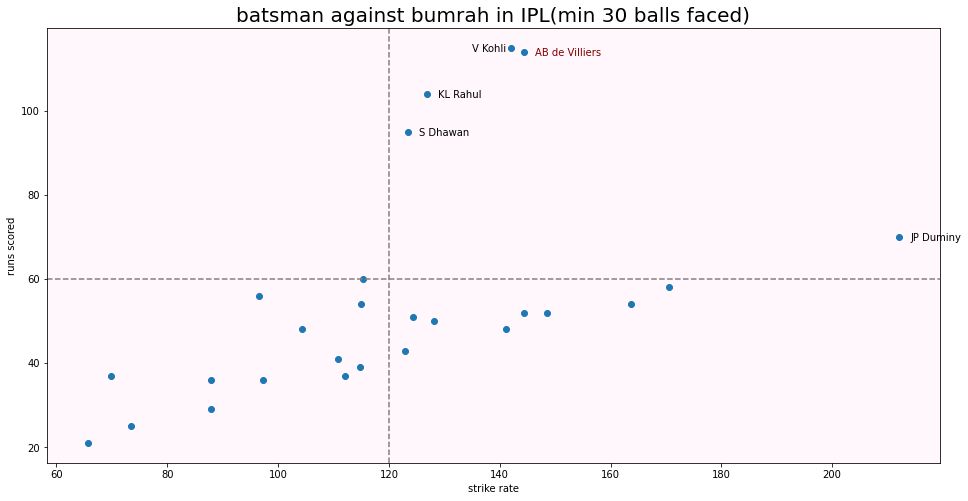

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(bdf3.strike_rate,bdf3.runs_off_bat)
for i in range(len(bdf3)):
   if bdf3.striker[i] == 'V Kohli':
        plt.text(bdf3.strike_rate[i] - 7, bdf3.runs_off_bat[i] - 1, bdf3.striker[i])
   elif bdf3.striker[i] == 'AB de Villiers':
        plt.text(bdf3.strike_rate[i] + 2, bdf3.runs_off_bat[i] - 1, bdf3.striker[i], color = 'maroon')
   elif (bdf3.striker[i] == 'S Dhawan') | (bdf3.striker[i] == 'KL Rahul') | (bdf3.striker[i] == 'JP Duminy'):
        plt.text(bdf3.strike_rate[i] + 2, bdf3.runs_off_bat[i] - 1, bdf3.striker[i])

plt.axvline(120, ls = '--', color = 'grey')
plt.axhline(60, ls = '--', color = 'grey')
plt.title('batsman against bumrah in IPL(min 30 balls faced)',fontsize=20)
plt.xlabel('strike rate')
plt.ylabel('runs scored')
plt.show()


In [ ]:
abd3 = abd1.merge(abd2, on = 'bowler', how = 'left')
abd3['strike_rate'] = 100*abd3['runs_off_bat']/abd3['ball']
abd3 = abd3[abd3.ball >= 30]
abd3.reset_index(inplace = True, drop = True)

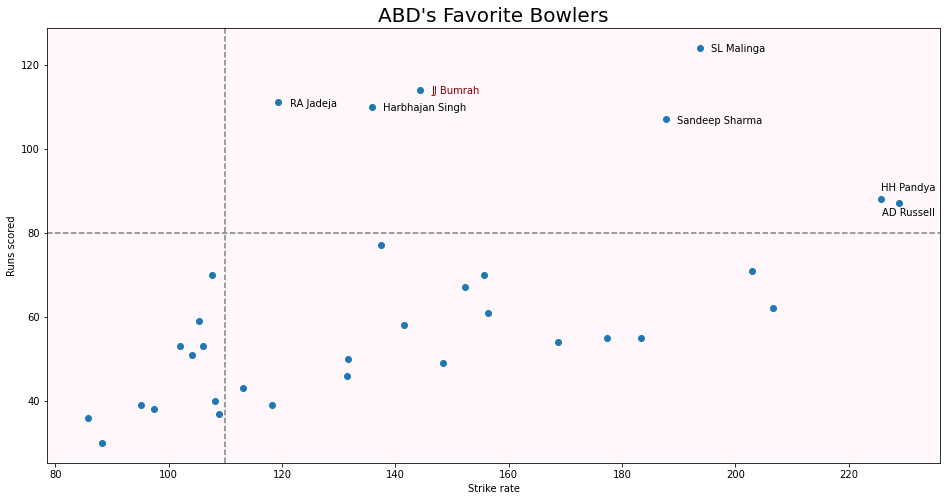

In [ ]:
plt.figure(figsize = (16,8))
plt.rcParams['axes.facecolor'] = '#fff7fb'
plt.scatter(abd3.strike_rate, abd3.runs_off_bat)

for i in range(len(abd3)):
    if abd3.bowler[i] == 'JJ Bumrah':
        plt.text(abd3.strike_rate[i] + 2, abd3.runs_off_bat[i] - 1, abd3.bowler[i], color = 'maroon')
    elif (abd3.bowler[i] == 'RA Jadeja') | (abd3.bowler[i] == 'SL Malinga') | (abd3.bowler[i] == 'Sandeep Sharma') | (abd3.bowler[i] == 'Harbhajan Singh'):
        plt.text(abd3.strike_rate[i] + 2, abd3.runs_off_bat[i] - 1, abd3.bowler[i])
    elif (abd3.bowler[i] == 'HH Pandya'):
        plt.text(abd3.strike_rate[i], abd3.runs_off_bat[i] + 2, abd3.bowler[i])
    elif (abd3.bowler[i] == 'AD Russell'):
        plt.text(abd3.strike_rate[i] - 3, abd3.runs_off_bat[i] - 3, abd3.bowler[i])

plt.axvline(110, ls = '--', color = 'grey')
plt.axhline(80, ls = '--', color = 'grey')
plt.title("ABD's Favorite Bowlers", fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')

plt.show()